# Бектестинг на python с pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams['lines.linewidth'] = 3

## Загрузка данных с yahoo finance

In [2]:
tsla = yf.Ticker("TSLA")

In [3]:
tsla_history = tsla.history(start="2020-01-01",interval="1d")

In [4]:
tsla_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,51428500,0,0.0
2020-01-02,84.900002,86.139999,84.342003,86.052002,47660500,0,0.0
2020-01-03,88.099998,90.800003,87.384003,88.601997,88892500,0,0.0
2020-01-06,88.094002,90.311996,88.000000,90.307999,50665000,0,0.0
2020-01-07,92.279999,94.325996,90.671997,93.811996,89410500,0,0.0
...,...,...,...,...,...,...,...
2021-03-29,615.640015,616.479980,596.020020,611.289978,28637000,0,0.0
2021-03-30,601.750000,637.659973,591.010010,635.619995,39432400,0,0.0
2021-03-31,646.619995,672.000000,641.109985,667.929993,33337300,0,0.0


## Рассчёт скользящих средних

In [5]:
tsla_history['ma_3'] = tsla_history['Close'].rolling(window=3).mean()
tsla_history['ma_10'] = tsla_history['Close'].rolling(window=10).mean()

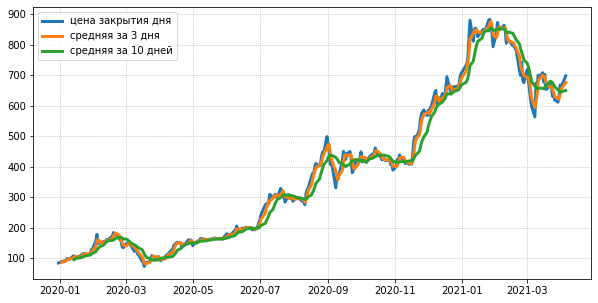

In [6]:
plt.figure()
plt.plot(tsla_history['Close'],label='close')
plt.plot(tsla_history['ma_3'],label='ma_3')
plt.plot(tsla_history['ma_10'],label='ma_10')
plt.legend(['цена закрытия дня','средняя за 3 дня','средняя за 10 дней'], loc=2)

## Рассчёт остального

In [7]:
tsla_history['position'] = (tsla_history['ma_3']-tsla_history['ma_10']).apply(np.sign)
tsla_history['log_return'] = tsla_history['Close'].apply(np.log).diff(1)
tsla_history['my_log_return'] = tsla_history['position'].shift(1)*tsla_history['log_return']
tsla_history['performance'] = tsla_history['my_log_return'].cumsum().apply(np.exp)

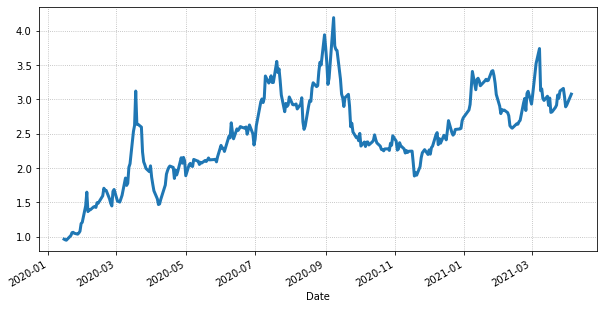

In [8]:
tsla_history['performance'].plot()

## Рассчёт комиссий

In [9]:
transaction_costs = 0.003
tsla_history['delta'] = tsla_history['position'].diff(1).abs()
tsla_history['tcs'] = tsla_history['delta']*transaction_costs
tsla_history['my_log_return_tcs'] = tsla_history['position'].shift(1)*tsla_history['log_return'] - tsla_history['tcs']
tsla_history['performance_tcs'] = tsla_history['my_log_return_tcs'].cumsum().apply(np.exp)

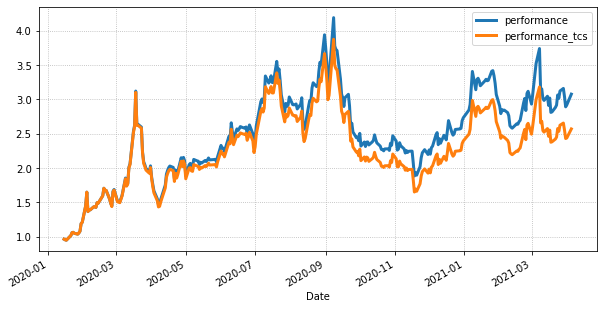

In [10]:
tsla_history[['performance','performance_tcs']].plot()
plt.legend(['без комиссий','с комиссиями'])